# 0. Import

In [1]:
import sys
sys.path.insert(1, '../')

from pckgs.import_pckg import *
from pckgs.units import *
# importing FIRAS data
from FIRAS import *

# importing generic constants and functions
from const_func_general import *
# importing distortion specific constants and functions
from cons_func_distortion import *


from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

from pckgs.plot_params import params
import matplotlib
matplotlib.rcParams.update(params)
#plt.rcParams['font.family'] = 'DeJavu Serif'
cols_default = plt.rcParams['axes.prop_cycle'].by_key()['color']

z_trans =  309000.0
r_trans =  3.28


<Figure size 432x288 with 0 Axes>

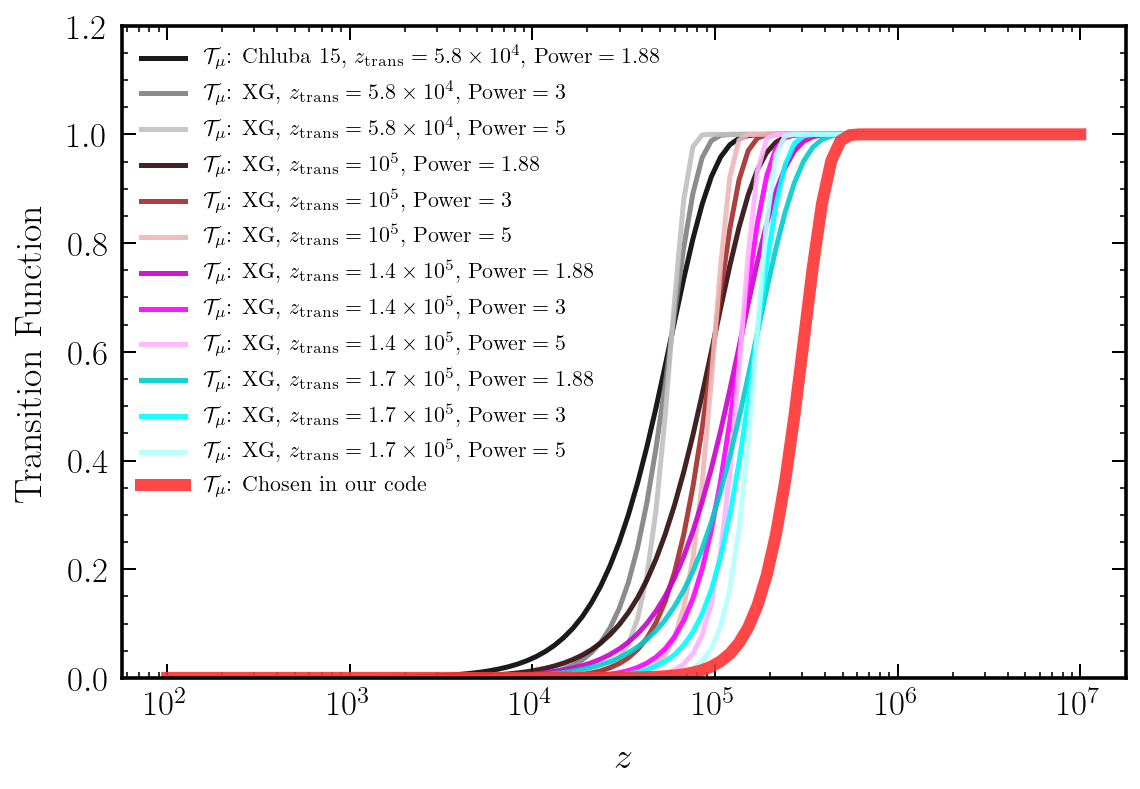

In [2]:
# Transition Function:
def Ttrans_mu_para(z,z_trans,Power_trans):
    
    Ttrans_mu = 1 - np.exp( -((1+z)/(1+z_trans))**Power_trans )
    
    return Ttrans_mu

z_trans_A     = 5.8 * 10**4
z_trans_B     = 10**5 
z_trans_C     = 1.4 * 10**5
z_trans_D     = 1.7 * 10**5
z_trans_E     = 1.9 * 10**5

Power_trans_A = 1.88
Power_trans_B = 3
Power_trans_C = 5

color_5p8e4_1p88 = lighten_color('gray', 2)
color_5p8e4_3    = lighten_color('gray', 1)
color_5p8e4_5    = lighten_color('gray', 0.5)

color_10e4_1p88  = lighten_color('brown', 1.5)
color_10e4_3     = lighten_color('brown', 1)
color_10e4_5     = lighten_color('brown', 0.3)

color_14e4_1p88  = lighten_color('magenta', 1.2)
color_14e4_3     = lighten_color('magenta', 1)
color_14e4_5     = lighten_color('magenta', 0.3)

color_17e4_1p88  = lighten_color('cyan', 1.2)
color_17e4_3     = lighten_color('cyan', 1)
color_17e4_5     = lighten_color('cyan', 0.3)

# z_trans_choose = 1.3*10**5
# r_trans_choose = 4

z_trans_choose = 3.09e5
r_trans_choose = 3.28

# z_trans_choose = 3.08e5
# r_trans_choose = 3.40

# z_trans_choose = 1.23*10**5
# r_trans_choose = 10

print("z_trans = ", z_trans_choose)
print("r_trans = ", r_trans_choose)

def Ttrans_mu_Chluba15(z):
    
    z_trans     = z_trans_A
    Power_trans = Power_trans_A
    
    return Ttrans_mu_para(z,z_trans,Power_trans)

def Ttrans_mu(z):
    
    # Trans_mu = Ttrans_mu_para(z,1.3*10**5,6)
    Trans_mu = Ttrans_mu_para(z,z_trans_choose,r_trans_choose)
    
    return Trans_mu


# ========================================================
z_test = np.logspace(2,7,100)

Reg_test=10**(-5)

plt.figure()

set_matplotlib_formats('retina')
plt.figure(figsize=(9,6))

plt.xscale('log')
# plt.yscale('log')

plt.plot(z_test,  Ttrans_mu_Chluba15(z_test)                       , label = r'$\mathcal{T}_\mu$: Chluba 15, $z_\mathrm{trans} = 5.8 \times 10^4$, $\mathrm{Power} = 1.88$', color = color_5p8e4_1p88  )
plt.plot(z_test,  Ttrans_mu_para(z_test,z_trans_A,Power_trans_B)   , label = r'$\mathcal{T}_\mu$: XG, $z_\mathrm{trans} = 5.8 \times 10^4$, $\mathrm{Power} = 3$',           color = color_5p8e4_3 )
plt.plot(z_test,  Ttrans_mu_para(z_test,z_trans_A,Power_trans_C)   , label = r'$\mathcal{T}_\mu$: XG, $z_\mathrm{trans} = 5.8 \times 10^4$, $\mathrm{Power} = 5$',           color = color_5p8e4_5 )

plt.plot(z_test,  Ttrans_mu_para(z_test,z_trans_B,Power_trans_A)   , label = r'$\mathcal{T}_\mu$: XG, $z_\mathrm{trans} = 10^5$, $\mathrm{Power} = 1.88$',                   color = color_10e4_1p88  )
plt.plot(z_test,  Ttrans_mu_para(z_test,z_trans_B,Power_trans_B)   , label = r'$\mathcal{T}_\mu$: XG, $z_\mathrm{trans} = 10^5$, $\mathrm{Power} = 3$',                      color = color_10e4_3     )
plt.plot(z_test,  Ttrans_mu_para(z_test,z_trans_B,Power_trans_C)   , label = r'$\mathcal{T}_\mu$: XG, $z_\mathrm{trans} = 10^5$, $\mathrm{Power} = 5$',                      color = color_10e4_5     )

plt.plot(z_test,  Ttrans_mu_para(z_test,z_trans_C,Power_trans_A)   , label = r'$\mathcal{T}_\mu$: XG, $z_\mathrm{trans} = 1.4 \times 10^5$, $\mathrm{Power} = 1.88$',        color = color_14e4_1p88  )
plt.plot(z_test,  Ttrans_mu_para(z_test,z_trans_C,Power_trans_B)   , label = r'$\mathcal{T}_\mu$: XG, $z_\mathrm{trans} = 1.4 \times 10^5$, $\mathrm{Power} = 3$',           color = color_14e4_3     )
plt.plot(z_test,  Ttrans_mu_para(z_test,z_trans_C,Power_trans_C)   , label = r'$\mathcal{T}_\mu$: XG, $z_\mathrm{trans} = 1.4 \times 10^5$, $\mathrm{Power} = 5$',           color = color_14e4_5     )

plt.plot(z_test,  Ttrans_mu_para(z_test,z_trans_D,Power_trans_A)   , label = r'$\mathcal{T}_\mu$: XG, $z_\mathrm{trans} = 1.7 \times 10^5$, $\mathrm{Power} = 1.88$',        color = color_17e4_1p88  )
plt.plot(z_test,  Ttrans_mu_para(z_test,z_trans_D,Power_trans_B)   , label = r'$\mathcal{T}_\mu$: XG, $z_\mathrm{trans} = 1.7 \times 10^5$, $\mathrm{Power} = 3$',           color = color_17e4_3     )
plt.plot(z_test,  Ttrans_mu_para(z_test,z_trans_D,Power_trans_C)   , label = r'$\mathcal{T}_\mu$: XG, $z_\mathrm{trans} = 1.7 \times 10^5$, $\mathrm{Power} = 5$',           color = color_17e4_5     )

# plt.plot(z_test,  Ttrans_mu_XG_19e4_1p88(z_test) , label = r'$\mathcal{T}_\mu$: XG, $z_\mathrm{trans} = 1.9 \times 10^5$, $\mathrm{Power} = 1.88$', color = lighten_color('purple', 0.3))
# plt.plot(z_test,  Ttrans_mu_XG_19e4_3(z_test)    , label = r'$\mathcal{T}_\mu$: XG, $z_\mathrm{trans} = 1.9 \times 10^5$, $\mathrm{Power} = 3$', color = lighten_color('purple', 1) )
# plt.plot(z_test,  Ttrans_mu_XG_19e4_5(z_test)    , label = r'$\mathcal{T}_\mu$: XG, $z_\mathrm{trans} = 1.9 \times 10^5$, $\mathrm{Power} = 5$', color = lighten_color('purple', 1.2) )

plt.plot(z_test,  Ttrans_mu(z_test), label = r'$\mathcal{T}_\mu$: Chosen in our code', color = lighten_color('red', 0.8), linewidth=6)

# plt.title(r'$G_\mu(x,x^\prime,z^\prime)$ Normalization')

plt.xlabel(r'$z$')
plt.ylabel(r'Transition Function')

plt.ylim(0, 1.2)

plt.legend(fontsize=11)

plt.savefig('Trans_Func.pdf')

In [3]:
# Green's function: mu/y transition-era (Doppler-part)
# x   : 1D array N_x
# xp  : 1D array N_xp
# T0  : Number  # in eV
def greens_muy_trans(x,x_prime,z_prime,T0,units="eV_per_cmSq"):
    
    if  units == 'eV_per_cmSq':  # units:    eV * cm^-2 * sr^-1
        prefac = 1
    elif units == 'SI':          # SI units: kg * s^-2 * sr^-1
        prefac = eV_to_J * (1/cm_to_m)**2
    elif units == 'MJy':         # units:    MJy * sr^-1
        prefac = eV_to_J * (1/cm_to_m)**2 * 1e26 / 1e6
    
    T_mu = Ttrans_mu(z_prime)
    
    greens_muy_trans = T_mu * greens_mu_MT(x,x_prime,z_prime,T0,units=units) + (1-T_mu) * greens_y(x,x_prime,z_prime,T0,units=units)

    return greens_muy_trans

#  Transition Era Compare

In [7]:
# Import the shapes from Chluba 2015
# ---------------------------------------------------------------------------------
# nu[GHz]-G[MJy/sr]
# ---------------------------------------------------------------------------------
# x=0.001
nu_G_Chluba_xp1em3_z6e4     = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp1em3_z6e4.csv') ) )
nu_G_Chluba_xp1em3_z7e4     = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp1em3_z7e4.csv') ) )
nu_G_Chluba_xp1em3_z8e4     = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp1em3_z8e4.csv') ) )
nu_G_Chluba_xp1em3_z9e4     = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp1em3_z9e4.csv') ) )
nu_G_Chluba_xp1em3_z1e5     = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp1em3_z1e5.csv') ) )
nu_G_Chluba_xp1em3_z1p5e5   = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp1em3_z1p5e5.csv') ) )
nu_G_Chluba_xp1em3_z2e5     = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp1em3_z2e5.csv') ) )
nu_G_Chluba_xp1em3_z3e5     = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp1em3_z3e5.csv') ) )

# x=0.01
nu_G_Chluba_xp1em2_z6e4     = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp1em2_z6e4.csv') ) )
nu_G_Chluba_xp1em2_z7e4     = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp1em2_z7e4.csv') ) )
nu_G_Chluba_xp1em2_z8e4     = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp1em2_z8e4.csv') ) )
nu_G_Chluba_xp1em2_z9e4     = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp1em2_z9e4.csv') ) )
nu_G_Chluba_xp1em2_z1e5     = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp1em2_z1e5.csv') ) )
nu_G_Chluba_xp1em2_z1p5e5   = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp1em2_z1p5e5.csv') ) )
nu_G_Chluba_xp1em2_z2e5     = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp1em2_z2e5.csv') ) )
nu_G_Chluba_xp1em2_z3e5     = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp1em2_z3e5.csv') ) )

# x=0.1
nu_G_Chluba_xp1em1_z6e4   = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp1em1_z6e4.csv') ) )
nu_G_Chluba_xp1em1_z7e4   = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp1em1_z7e4.csv') ) )
nu_G_Chluba_xp1em1_z8e4   = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp1em1_z8e4.csv') ) )
nu_G_Chluba_xp1em1_z9e4   = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp1em1_z9e4.csv') ) )
nu_G_Chluba_xp1em1_z1e5   = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp1em1_z1e5.csv') ) )
nu_G_Chluba_xp1em1_z1p5e5 = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp1em1_z1p5e5.csv') ) )
nu_G_Chluba_xp1em1_z2e5   = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp1em1_z2e5.csv') ) )
nu_G_Chluba_xp1em1_z3e5   = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp1em1_z3e5.csv') ) )

# x=1
nu_G_Chluba_xp1_z6e4      = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp1_z6e4.csv') ) )
nu_G_Chluba_xp1_z7e4      = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp1_z7e4.csv') ) )
nu_G_Chluba_xp1_z8e4      = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp1_z8e4.csv') ) )
nu_G_Chluba_xp1_z9e4      = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp1_z9e4.csv') ) )
nu_G_Chluba_xp1_z1e5      = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp1_z1e5.csv') ) )
nu_G_Chluba_xp1_z1p5e5    = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp1_z1p5e5.csv') ) )
nu_G_Chluba_xp1_z2e5      = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp1_z2e5.csv') ) )
nu_G_Chluba_xp1_z3e5      = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp1_z3e5.csv') ) )

# x=5
nu_G_Chluba_xp5_z6e4      = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp5_z6e4.csv'  ) ) )
nu_G_Chluba_xp5_z7e4      = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp5_z7e4.csv'  ) ) )
nu_G_Chluba_xp5_z8e4      = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp5_z8e4.csv'  ) ) )
nu_G_Chluba_xp5_z9e4      = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp5_z9e4.csv'  ) ) )
nu_G_Chluba_xp5_z1e5      = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp5_z1e5.csv'  ) ) )
nu_G_Chluba_xp5_z1p5e5    = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp5_z1p5e5.csv') ) )
nu_G_Chluba_xp5_z2e5      = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp5_z2e5.csv'  ) ) )
nu_G_Chluba_xp5_z3e5      = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp5_z3e5.csv'  ) ) )

# x=15
nu_G_Chluba_xp15_z6e4      = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp15_z6e4.csv') ) )
nu_G_Chluba_xp15_z7e4      = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp15_z7e4.csv') ) )
nu_G_Chluba_xp15_z8e4      = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp15_z8e4.csv') ) )
nu_G_Chluba_xp15_z9e4      = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp15_z9e4.csv') ) )
nu_G_Chluba_xp15_z1e5      = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp15_z1e5.csv') ) )
nu_G_Chluba_xp15_z1p5e5    = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp15_z1p5e5.csv') ) )
nu_G_Chluba_xp15_z2e5      = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp15_z2e5.csv') ) )
nu_G_Chluba_xp15_z3e5      = np.transpose( np.array( pd.read_csv('../data/data_input_greensfunc/xp15_z3e5.csv') ) )


# ---------------------------------------------------------------------------------
# x-G[MJy/sr]
# ---------------------------------------------------------------------------------
# x=0.001
x_G_Chluba_xp1em3_z6e4   = np.vstack((nu_G_Chluba_xp1em3_z6e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em3_z6e4[1]))
x_G_Chluba_xp1em3_z7e4   = np.vstack((nu_G_Chluba_xp1em3_z7e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em3_z7e4[1]))
x_G_Chluba_xp1em3_z8e4   = np.vstack((nu_G_Chluba_xp1em3_z8e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em3_z8e4[1]))
x_G_Chluba_xp1em3_z9e4   = np.vstack((nu_G_Chluba_xp1em3_z9e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em3_z9e4[1]))
x_G_Chluba_xp1em3_z1e5   = np.vstack((nu_G_Chluba_xp1em3_z1p5e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em3_z1p5e5[1]))
x_G_Chluba_xp1em3_z1p5e5 = np.vstack((nu_G_Chluba_xp1em3_z1p5e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em3_z1p5e5[1]))
x_G_Chluba_xp1em3_z2e5   = np.vstack((nu_G_Chluba_xp1em3_z2e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em3_z2e5[1]))
x_G_Chluba_xp1em3_z3e5   = np.vstack((nu_G_Chluba_xp1em3_z3e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em3_z3e5[1]))

# x=0.01
x_G_Chluba_xp1em2_z6e4    = np.vstack((nu_G_Chluba_xp1em2_z6e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em2_z6e4[1]))
x_G_Chluba_xp1em2_z7e4    = np.vstack((nu_G_Chluba_xp1em2_z7e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em2_z7e4[1]))
x_G_Chluba_xp1em2_z8e4    = np.vstack((nu_G_Chluba_xp1em2_z8e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em2_z8e4[1]))
x_G_Chluba_xp1em2_z9e4    = np.vstack((nu_G_Chluba_xp1em2_z9e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em2_z9e4[1]))
x_G_Chluba_xp1em2_z1e5    = np.vstack((nu_G_Chluba_xp1em2_z1e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em2_z1e5[1]))
x_G_Chluba_xp1em2_z1p5e5  = np.vstack((nu_G_Chluba_xp1em2_z1p5e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em2_z1p5e5[1]))
x_G_Chluba_xp1em2_z2e5    = np.vstack((nu_G_Chluba_xp1em2_z2e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em2_z2e5[1]))
x_G_Chluba_xp1em2_z3e5    = np.vstack((nu_G_Chluba_xp1em2_z3e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em2_z3e5[1]))

# x=0.1
x_G_Chluba_xp1em1_z6e4    = np.vstack((nu_G_Chluba_xp1em1_z6e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em1_z6e4[1]))
x_G_Chluba_xp1em1_z7e4    = np.vstack((nu_G_Chluba_xp1em1_z7e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em1_z7e4[1]))
x_G_Chluba_xp1em1_z8e4    = np.vstack((nu_G_Chluba_xp1em1_z8e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em1_z8e4[1]))
x_G_Chluba_xp1em1_z9e4    = np.vstack((nu_G_Chluba_xp1em1_z9e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em1_z9e4[1]))
x_G_Chluba_xp1em1_z1e5    = np.vstack((nu_G_Chluba_xp1em1_z1e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em1_z1e5[1]))
x_G_Chluba_xp1em1_z1p5e5  = np.vstack((nu_G_Chluba_xp1em1_z1p5e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em1_z1p5e5[1]))
x_G_Chluba_xp1em1_z2e5    = np.vstack((nu_G_Chluba_xp1em1_z2e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em1_z2e5[1]))
x_G_Chluba_xp1em1_z3e5    = np.vstack((nu_G_Chluba_xp1em1_z3e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1em1_z3e5[1]))

# x=1
x_G_Chluba_xp1_z6e4       = np.vstack((nu_G_Chluba_xp1_z6e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1_z6e4[1]))
x_G_Chluba_xp1_z7e4       = np.vstack((nu_G_Chluba_xp1_z7e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1_z7e4[1]))
x_G_Chluba_xp1_z8e4       = np.vstack((nu_G_Chluba_xp1_z8e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1_z8e4[1]))
x_G_Chluba_xp1_z9e4       = np.vstack((nu_G_Chluba_xp1_z9e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1_z9e4[1]))
x_G_Chluba_xp1_z1e5       = np.vstack((nu_G_Chluba_xp1_z1e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1_z1e5[1]))
x_G_Chluba_xp1_z1p5e5     = np.vstack((nu_G_Chluba_xp1_z1p5e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1_z1p5e5[1]))
x_G_Chluba_xp1_z2e5       = np.vstack((nu_G_Chluba_xp1_z2e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1_z2e5[1]))
x_G_Chluba_xp1_z3e5       = np.vstack((nu_G_Chluba_xp1_z3e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp1_z3e5[1]))

# x=5
x_G_Chluba_xp5_z6e4       = np.vstack((nu_G_Chluba_xp5_z6e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp5_z6e4[1]))
x_G_Chluba_xp5_z7e4       = np.vstack((nu_G_Chluba_xp5_z7e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp5_z7e4[1]))
x_G_Chluba_xp5_z8e4       = np.vstack((nu_G_Chluba_xp5_z8e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp5_z8e4[1]))
x_G_Chluba_xp5_z9e4       = np.vstack((nu_G_Chluba_xp5_z9e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp5_z9e4[1]))
x_G_Chluba_xp5_z1e5       = np.vstack((nu_G_Chluba_xp5_z1e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp5_z1e5[1]))
x_G_Chluba_xp5_z1p5e5     = np.vstack((nu_G_Chluba_xp5_z1p5e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp5_z1p5e5[1]))
x_G_Chluba_xp5_z2e5       = np.vstack((nu_G_Chluba_xp5_z2e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp5_z2e5[1]))
x_G_Chluba_xp5_z3e5       = np.vstack((nu_G_Chluba_xp5_z3e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp5_z3e5[1]))

# x=15
x_G_Chluba_xp15_z6e4      = np.vstack((nu_G_Chluba_xp15_z6e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp15_z6e4[1]))
x_G_Chluba_xp15_z7e4      = np.vstack((nu_G_Chluba_xp15_z7e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp15_z7e4[1]))
x_G_Chluba_xp15_z8e4      = np.vstack((nu_G_Chluba_xp15_z8e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp15_z8e4[1]))
x_G_Chluba_xp15_z9e4      = np.vstack((nu_G_Chluba_xp15_z9e4[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp15_z9e4[1]))
x_G_Chluba_xp15_z1e5      = np.vstack((nu_G_Chluba_xp15_z1e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp15_z1e5[1]))
x_G_Chluba_xp15_z1p5e5    = np.vstack((nu_G_Chluba_xp15_z1p5e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp15_z1p5e5[1]))
x_G_Chluba_xp15_z2e5      = np.vstack((nu_G_Chluba_xp15_z2e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp15_z2e5[1]))
x_G_Chluba_xp15_z3e5      = np.vstack((nu_G_Chluba_xp15_z3e5[0]*(1e9*sInv_to_eV)*(2*np.pi/TCMB_0), nu_G_Chluba_xp15_z3e5[1]))

### Transition Era: $x=0.001$

x_prime    =  0.001
z_prime_1  =  300000
z_prime_2A =  200000
z_prime_3  =  60000
----------------------------
Transition Era:  10000 < z < 300000
----------------------------
z_trans =  309000.0
r_trans =  3.28


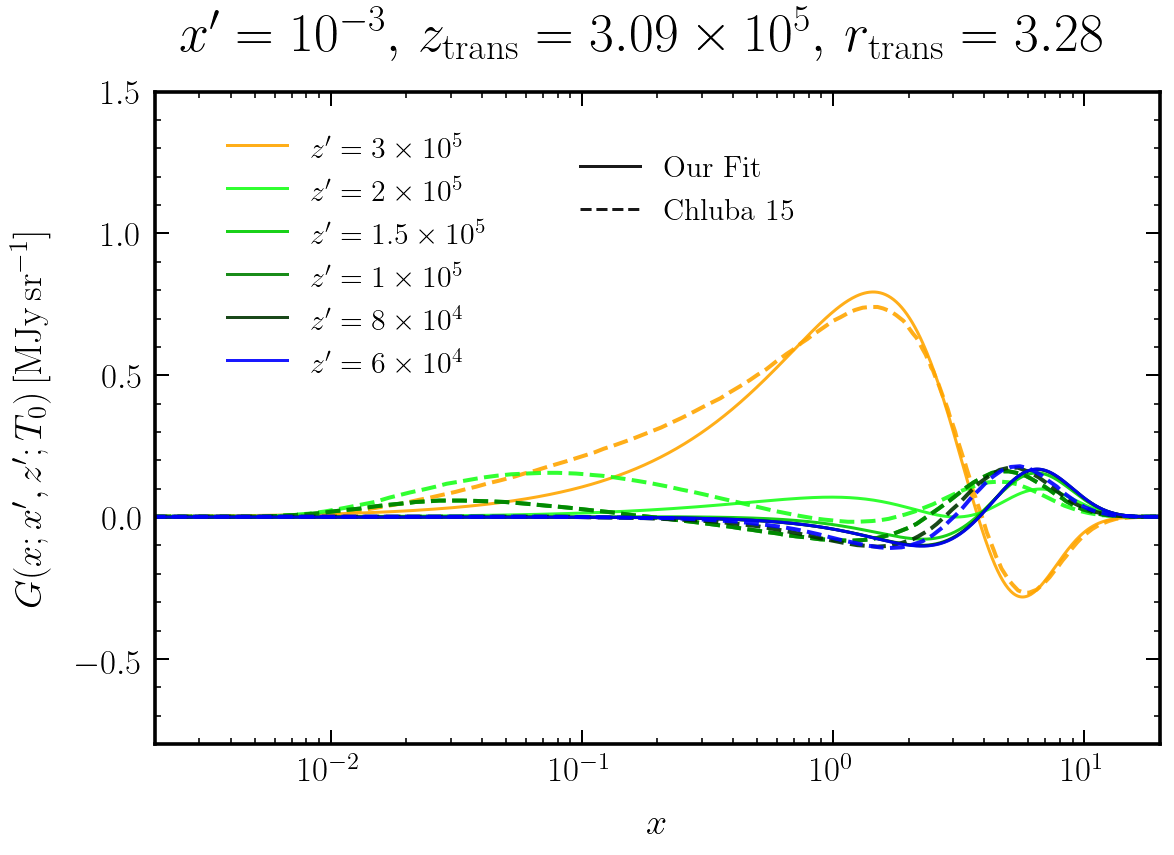

In [5]:
z_prime_test_1   = 3*10**5
z_prime_test_2A  = 2*10**5
z_prime_test_2B  = 1.5*10**5
z_prime_test_2C  = 1*10**5
z_prime_test_2D  = 8*10**4
z_prime_test_3   = 6*10**4

nu_ary_test = np.logspace(np.log10(1e-2),np.log10(2000),1000)  # GHz
x_ary_test  = nu_ary_test * (2*np.pi) * (10**9 * sInv_to_eV)/TCMB_0

x_prime_ary_test = np.array([0.001])

G_ary_test_1   = np.transpose( greens_muy_trans(x_ary_test,x_prime_ary_test,z_prime_test_1,TCMB_0,units="MJy") )
G_ary_test_2A  = np.transpose( greens_muy_trans(x_ary_test,x_prime_ary_test,z_prime_test_2A,TCMB_0,units="MJy") )
G_ary_test_2B  = np.transpose( greens_muy_trans(x_ary_test,x_prime_ary_test,z_prime_test_2B,TCMB_0,units="MJy") )
G_ary_test_2C  = np.transpose( greens_muy_trans(x_ary_test,x_prime_ary_test,z_prime_test_2C,TCMB_0,units="MJy") )
G_ary_test_2D  = np.transpose( greens_muy_trans(x_ary_test,x_prime_ary_test,z_prime_test_2D,TCMB_0,units="MJy") )
G_ary_test_3   = np.transpose( greens_muy_trans(x_ary_test,x_prime_ary_test,z_prime_test_3,TCMB_0,units="MJy") )

set_matplotlib_formats('retina')

fig, ax = plt.subplots()

fig.set_size_inches(9, 6)

# ====================================================
# color for different eras
color_free = 'purple'
color_y    = 'blue'
color_trans= 'green'
color_mu   = 'orange'
color_T    = 'red'
# ====================================================

color_1   = lighten_color(color_mu,1)
color_2A  = lighten_color(color_trans,0.6)
color_2B  = lighten_color(color_trans,0.8)
color_2C  = lighten_color(color_trans,1)
color_2D  = lighten_color(color_trans,1.2)
color_3   = lighten_color(color_y,1)

solidwidth  = 1.5
dashedwidth = 2

G_1_Plt,        = ax.plot(    x_ary_test,   G_ary_test_1[0]  , color=color_1 , label=r'$z^\prime = 3 \times 10^5$', linewidth= solidwidth  )
G_1_Plt_Chluba, = ax.plot(    x_G_Chluba_xp1em3_z3e5[0],   x_G_Chluba_xp1em3_z3e5[1]  , color=color_1 ,  linestyle='dashed', linewidth= dashedwidth  )

G_2A_Plt,        = ax.plot(   x_ary_test,   G_ary_test_2A[0]  , color=color_2A , label=r'$z^\prime = 2 \times 10^5$', linewidth= solidwidth  )
G_2A_Plt_Chluba, = ax.plot(   x_G_Chluba_xp1em3_z2e5[0],   x_G_Chluba_xp1em3_z2e5[1]  , color=color_2A ,  linestyle='dashed', linewidth= dashedwidth  )

G_2B_Plt,        = ax.plot(   x_ary_test,   G_ary_test_2B[0]  , color=color_2B , label=r'$z^\prime = 1.5 \times 10^5$', linewidth= solidwidth  )
G_2B_Plt_Chluba, = ax.plot(   x_G_Chluba_xp1em3_z1p5e5[0],   x_G_Chluba_xp1em3_z1p5e5[1]  , color=color_2B ,  linestyle='dashed', linewidth= dashedwidth  )

G_2C_Plt,        = ax.plot(   x_ary_test,   G_ary_test_2C[0]  , color=color_2C , label=r'$z^\prime = 1 \times 10^5$', linewidth= solidwidth  )
G_2C_Plt_Chluba, = ax.plot(   x_G_Chluba_xp1em3_z1e5[0],   x_G_Chluba_xp1em3_z1e5[1]  , color=color_2C ,  linestyle='dashed', linewidth= dashedwidth  )

G_2D_Plt,        = ax.plot(   x_ary_test,   G_ary_test_2D[0]  , color=color_2D , label=r'$z^\prime = 8 \times 10^4$', linewidth= solidwidth  )
G_2D_Plt_Chluba, = ax.plot(   x_G_Chluba_xp1em3_z8e4[0],   x_G_Chluba_xp1em3_z8e4[1]  , color=color_2D ,  linestyle='dashed', linewidth= dashedwidth  )

G_3_Plt,        = ax.plot(    x_ary_test,   G_ary_test_3[0]  , color=color_3 , label=r'$z^\prime = 6 \times 10^4$', linewidth= solidwidth  )
G_3_Plt_Chluba, = ax.plot(    x_G_Chluba_xp1em3_z6e4[0],   x_G_Chluba_xp1em3_z6e4[1]  , color=color_3 ,  linestyle='dashed', linewidth= dashedwidth  )


G_Fake_Plt_Ours,          = ax.plot(    x_ary_test,   np.zeros(len(x_ary_test)) + 1e100  , color='black' , label=r'Our Fit', linewidth= solidwidth  )
G_Fake_Plt_Chluba,        = ax.plot(    x_ary_test,   np.zeros(len(x_ary_test)) + 1e100 , color='black' , label=r'Chluba 15',  linestyle='dashed', linewidth= solidwidth  )


# ax.text(100, 400, r'$x^\prime = 0.1$', fontsize=18, color='black', rotation=0)

ax.set_xscale('log')

plt.xlabel(r'$x$')
plt.ylabel(r'$G(x;x^\prime,z^\prime;T_0)\,[\mathrm{MJy}\,\mathrm{sr}^{-1}]$')

# legend1 = plt.legend(handles=[G_1_Plt, G_2A_Plt, G_2B_Plt, G_2C_Plt, G_2D_Plt, G_3_Plt],                      bbox_to_anchor=(0.12 ,0.8), fontsize=10, loc= 'center' )
# legend2 = plt.legend(handles=[G_1_Plt_Chluba, G_2A_Plt_Chluba, G_2B_Plt_Chluba, G_2C_Plt_Chluba,  G_2D_Plt_Chluba, G_3_Plt_Chluba], bbox_to_anchor=(0.37,0.8), fontsize=10, loc= 'center' )

legend1 = plt.legend(handles=[G_1_Plt, G_2A_Plt, G_2B_Plt, G_2C_Plt, G_2D_Plt, G_3_Plt],                      bbox_to_anchor=(0.2 ,0.75), fontsize=15, loc= 'center' )
# legend2 = plt.legend(handles=[G_1_Plt_Chluba, G_2A_Plt_Chluba, G_2B_Plt_Chluba, G_2C_Plt_Chluba,  G_2D_Plt_Chluba, G_3_Plt_Chluba], bbox_to_anchor=(0.5,0.6), fontsize=15, loc= 'center' )
legend_3 = plt.legend(handles=[G_Fake_Plt_Ours, G_Fake_Plt_Chluba], bbox_to_anchor=(0.53,0.85), fontsize=15, loc= 'center' )


plt.suptitle(r"$x^\prime = 10^{-3}, \, z_\mathrm{trans} = 3.09 \times 10^5, \, r_\mathrm{trans}=3.28$", y=0.97, fontsize=27)

# plt.xlim(x_ary_test[0], x_ary_test[-1])
plt.xlim(0.002, 20)
plt.ylim(-0.8, 1.5)

print('x_prime    = ', x_prime_ary_test[0])

print('z_prime_1  = ', z_prime_test_1)
print('z_prime_2A = ' , z_prime_test_2A)
print('z_prime_3  = ', z_prime_test_3)

print('----------------------------')
print('Transition Era: ', z_trans_1, '< z <', z_trans_2)
print('----------------------------')

print('z_trans = ', z_trans_choose)
print('r_trans = ', r_trans_choose)

plt.gca().add_artist(legend1)
# plt.gca().add_artist(legend2)

plt.savefig('GreenShape_plt_xp1em3.pdf')
plt.savefig('GreenShape_plt_xp1em3.png', dpi=350)

### Transition Era: $x=0.001$

In [6]:
# xp = 0.001

# z = 6*10^4
x_G_Chluba_Func_xp1em3_z6e4   = interp1d(x_G_Chluba_xp1em3_z6e4[0], x_G_Chluba_xp1em3_z6e4[1], fill_value="extrapolate")

# z = 7*10^4
x_G_Chluba_Func_xp1em3_z7e4   = interp1d(x_G_Chluba_xp1em3_z7e4[0], x_G_Chluba_xp1em3_z7e4[1], fill_value="extrapolate")

# z = 8*10^4
x_G_Chluba_Func_xp1em3_z8e4   = interp1d(x_G_Chluba_xp1em3_z8e4[0], x_G_Chluba_xp1em3_z8e4[1], fill_value="extrapolate")

# z = 9*10^4
x_G_Chluba_Func_xp1em3_z9e4   = interp1d(x_G_Chluba_xp1em3_z9e4[0], x_G_Chluba_xp1em3_z9e4[1], fill_value="extrapolate")

# z = 10^5
x_G_Chluba_Func_xp1em3_z1e5   = interp1d(x_G_Chluba_xp1em3_z1e5[0], x_G_Chluba_xp1em3_z1e5[1], fill_value="extrapolate")

# z = 1.5*10^5
x_G_Chluba_Func_xp1em3_z1p5e5 = interp1d(x_G_Chluba_xp1em3_z1p5e5[0], x_G_Chluba_xp1em3_z1p5e5[1], fill_value="extrapolate")

# z = 2*10^5
x_G_Chluba_Func_xp1em3_z2e5   = interp1d(x_G_Chluba_xp1em3_z2e5[0], x_G_Chluba_xp1em3_z2e5[1], fill_value="extrapolate")

# z = 3*10^5
x_G_Chluba_Func_xp1em3_z3e5   = interp1d(x_G_Chluba_xp1em3_z3e5[0], x_G_Chluba_xp1em3_z3e5[1], fill_value="extrapolate")



# z = 6*10^4
def Error_xp1em3_z6e4(z_trans, r_trans, N, x_min, x_max, Power):
    
    xp_ary_choose = np.array( [0.001] )
    z_choose = 6e4
    
    x_ary = np.array( np.logspace(np.log10(x_min),np.log10(x_max),N) )
    
    log10_x_ary = np.log10(x_ary)
    
    Trans_mu = Ttrans_mu_para(z_choose,z_trans,r_trans)
    
    greens_mu_trans_2Dary = Trans_mu * greens_mu_MT(x_ary,xp_ary_choose,z_choose,TCMB_0,units='MJy') + (1-Trans_mu) * greens_y(x_ary,xp_ary_choose,z_choose,TCMB_0,units='MJy')
    
    greens_mu_trans_ary = np.transpose(greens_mu_trans_2Dary)[0]

    norm = np.trapz( np.abs( x_G_Chluba_Func_xp1em3_z6e4(x_ary) - greens_mu_trans_ary )**2 * (x_ary**Power), x_ary)
    
    return norm

# z = 7*10^4
def Error_xp1em3_z7e4(z_trans, r_trans, N, x_min, x_max, Power):
    
    xp_ary_choose = np.array( [0.001] )
    z_choose = 7e4
    
    x_ary = np.array( np.logspace(np.log10(x_min),np.log10(x_max),N) )
    
    log10_x_ary = np.log10(x_ary)
    
    Trans_mu = Ttrans_mu_para(z_choose,z_trans,r_trans)
    
    greens_mu_trans_2Dary = Trans_mu * greens_mu_MT(x_ary,xp_ary_choose,z_choose,TCMB_0,units='MJy') + (1-Trans_mu) * greens_y(x_ary,xp_ary_choose,z_choose,TCMB_0,units='MJy')
    
    greens_mu_trans_ary = np.transpose(greens_mu_trans_2Dary)[0]

    norm = np.trapz( np.abs( x_G_Chluba_Func_xp1em3_z7e4(x_ary) - greens_mu_trans_ary )**2 * (x_ary**Power), x_ary)
    
    return norm

# z = 8*10^4
def Error_xp1em3_z8e4(z_trans, r_trans, N, x_min, x_max, Power):
    
    xp_ary_choose = np.array( [0.001] )
    z_choose = 8e4
    
    x_ary = np.array( np.logspace(np.log10(x_min),np.log10(x_max),N) )
    
    log10_x_ary = np.log10(x_ary)
    
    Trans_mu = Ttrans_mu_para(z_choose,z_trans,r_trans)
    
    greens_mu_trans_2Dary = Trans_mu * greens_mu_MT(x_ary,xp_ary_choose,z_choose,TCMB_0,units='MJy') + (1-Trans_mu) * greens_y(x_ary,xp_ary_choose,z_choose,TCMB_0,units='MJy')
    
    greens_mu_trans_ary = np.transpose(greens_mu_trans_2Dary)[0]

    norm = np.trapz( np.abs( x_G_Chluba_Func_xp1em3_z8e4(x_ary) - greens_mu_trans_ary )**2 * (x_ary**Power), x_ary)
    
    return norm

# z = 9*10^4
def Error_xp1em3_z9e4(z_trans, r_trans, N, x_min, x_max, Power):
    
    xp_ary_choose = np.array( [0.001] )
    z_choose = 9e4
    
    x_ary = np.array( np.logspace(np.log10(x_min),np.log10(x_max),N) )
    
    log10_x_ary = np.log10(x_ary)
    
    Trans_mu = Ttrans_mu_para(z_choose,z_trans,r_trans)
    
    greens_mu_trans_2Dary = Trans_mu * greens_mu_MT(x_ary,xp_ary_choose,z_choose,TCMB_0,units='MJy') + (1-Trans_mu) * greens_y(x_ary,xp_ary_choose,z_choose,TCMB_0,units='MJy')
    
    greens_mu_trans_ary = np.transpose(greens_mu_trans_2Dary)[0]
    
    norm = np.trapz( np.abs( x_G_Chluba_Func_xp1em3_z9e4(x_ary) - greens_mu_trans_ary )**2 * (x_ary**Power), x_ary)
    
    return norm

# z = 1*10^5
def Error_xp1em3_z1e5(z_trans, r_trans, N, x_min, x_max, Power):
    
    xp_ary_choose = np.array( [0.001] )
    z_choose = 1e5
    
    x_ary = np.array( np.logspace(np.log10(x_min),np.log10(x_max),N) )
    
    log10_x_ary = np.log10(x_ary)
    
    Trans_mu = Ttrans_mu_para(z_choose,z_trans,r_trans)
    
    greens_mu_trans_2Dary = Trans_mu * greens_mu_MT(x_ary,xp_ary_choose,z_choose,TCMB_0,units='MJy') + (1-Trans_mu) * greens_y(x_ary,xp_ary_choose,z_choose,TCMB_0,units='MJy')
    
    greens_mu_trans_ary = np.transpose(greens_mu_trans_2Dary)[0]
    
    norm = np.trapz( np.abs( x_G_Chluba_Func_xp1em3_z1e5(x_ary) - greens_mu_trans_ary )**2 * (x_ary**Power), x_ary)
    
    return norm


# z = 1.5*10^5
def Error_xp1em3_z1p5e5(z_trans, r_trans, N, x_min, x_max, Power):
    
    xp_ary_choose = np.array( [0.001] )
    z_choose = 1.5e5
    
    x_ary = np.array( np.logspace(np.log10(x_min),np.log10(x_max),N) )
    
    log10_x_ary = np.log10(x_ary)
    
    Trans_mu = Ttrans_mu_para(z_choose,z_trans,r_trans)
    
    greens_mu_trans_2Dary = Trans_mu * greens_mu_MT(x_ary,xp_ary_choose,z_choose,TCMB_0,units='MJy') + (1-Trans_mu) * greens_y(x_ary,xp_ary_choose,z_choose,TCMB_0,units='MJy')
    
    greens_mu_trans_ary = np.transpose(greens_mu_trans_2Dary)[0]
    
    norm = np.trapz( np.abs( x_G_Chluba_Func_xp1em3_z1p5e5(x_ary) - greens_mu_trans_ary )**2 * (x_ary**Power), x_ary )
    
    return norm


# z = 2*10^5
def Error_xp1em3_z2e5(z_trans, r_trans, N, x_min, x_max, Power):
    
    xp_ary_choose = np.array( [0.001] )
    z_choose = 2e5
    
    x_ary = np.array( np.logspace(np.log10(x_min),np.log10(x_max),N) )
    
    log10_x_ary = np.log10(x_ary)
    
    Trans_mu = Ttrans_mu_para(z_choose,z_trans,r_trans)
    
    greens_mu_trans_2Dary = Trans_mu * greens_mu_MT(x_ary,xp_ary_choose,z_choose,TCMB_0,units='MJy') + (1-Trans_mu) * greens_y(x_ary,xp_ary_choose,z_choose,TCMB_0,units='MJy')
    
    greens_mu_trans_ary = np.transpose(greens_mu_trans_2Dary)[0]
    
    norm = np.trapz( np.abs( x_G_Chluba_Func_xp1em3_z2e5(x_ary) - greens_mu_trans_ary )**2 * (x_ary**Power), x_ary )
    
    return norm


# z = 3*10^5
def Error_xp1em3_z3e5(z_trans, r_trans, N, x_min, x_max, Power):
    
    xp_ary_choose = np.array( [0.001] )
    z_choose = 3e5
    
    x_ary = np.array( np.logspace(np.log10(x_min),np.log10(x_max),N) )
    
    log10_x_ary = np.log10(x_ary)
    
    Trans_mu = Ttrans_mu_para(z_choose,z_trans,r_trans)
    
    greens_mu_trans_2Dary = Trans_mu * greens_mu_MT(x_ary,xp_ary_choose,z_choose,TCMB_0,units='MJy') + (1-Trans_mu) * greens_y(x_ary,xp_ary_choose,z_choose,TCMB_0,units='MJy')
    
    greens_mu_trans_ary = np.transpose(greens_mu_trans_2Dary)[0]
    
    norm = np.trapz( np.abs( x_G_Chluba_Func_xp1em3_z3e5(x_ary) - greens_mu_trans_ary )**2 * (x_ary**Power), x_ary )
    
    return norm


# Total Error
def Error_xp1em3_Tot(z_trans, r_trans, N, x_min, x_max, Power):
    
    Error_Calc = ( 
                   Error_xp1em3_z6e4(z_trans, r_trans, N, x_min, x_max   , Power)
                 + Error_xp1em3_z7e4(z_trans, r_trans, N, x_min, x_max   , Power)
                 + Error_xp1em3_z8e4(z_trans, r_trans, N, x_min, x_max   , Power)
                 + Error_xp1em3_z9e4(z_trans, r_trans, N, x_min, x_max   , Power)
                 + Error_xp1em3_z1e5(z_trans, r_trans, N, x_min, x_max   , Power)
                 + Error_xp1em3_z1p5e5(z_trans, r_trans, N, x_min, x_max , Power)
                 + Error_xp1em3_z2e5(z_trans, r_trans, N, x_min, x_max   , Power)
                 + Error_xp1em3_z3e5(z_trans, r_trans, N, x_min, x_max   , Power) 
                 )
    
    return Error_Calc

z_trans_test = 3.09e5
r_trans_test = 3.28

N_test       = 100
x_min_test   = 1e-1
x_max_test   = 1e1
# x_min_test   = 3e-1
# x_max_test   = 3

Power_test = -1

print('z_trans = ', z_trans_test )
print('r_trans = ', r_trans_test )
print('Power   = ', Power_test )

print('Error = ', Error_xp1em3_Tot(z_trans_test, r_trans_test, N_test, x_min_test, x_max_test, Power_test) )
print('-----------------------------------------------------------------------------')

# -----------------------------------------------------------------------------------
from   scipy.optimize import fmin

def Error_func(z_r_trans):
    
    return Error_xp1em3_Tot(z_r_trans[0], z_r_trans[1], N_test, x_min_test, x_max_test, Power_test)

fmin(Error_func, x0 = (1.5e5,5))

z_trans =  309000.0
r_trans =  3.28
Power   =  -1
Error =  0.10579380163752203
-----------------------------------------------------------------------------
Optimization terminated successfully.
         Current function value: 0.105789
         Iterations: 83
         Function evaluations: 165


array([3.09313555e+05, 3.27755531e+00])